In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义波函数归一化函数
def normalize_wave_function(phi):
    norm_factor = np.real(np.sum(np.conj(phi) * phi, axis=0))
    return phi / np.sqrt(norm_factor)

# 定义计算速度场的函数
def compute_velocity(phi, hbar):
    phi_conj = np.conj(phi)
    grad_phi = np.gradient(phi, axis=(0, 1))  # Assuming a 2D gradient for visualization
    dot_product = np.sum([g * phi_conj for g in grad_phi], axis=0)
    norm_factor = np.real(np.sum(phi_conj * phi, axis=0))
    velocity = hbar * dot_product / norm_factor
    return velocity



In [ ]:
# 示例波函数数据（简单的二维复数波函数）
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
phi1 = (x + 1j * y)
phi2 = (x - 1j * y)
phi = np.stack((phi1, phi2))


phi.shape

In [ ]:
# 归一化波函数
phi = normalize_wave_function(phi)

# 计算速度场
hbar = 0.1  # 可调参数
velocity = compute_velocity(phi, hbar)

# 可视化波函数的实部
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Real part of $\phi$")
plt.quiver(x, y, np.real(phi[0]), np.real(phi[1]), color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# 可视化速度场
plt.subplot(1, 2, 2)
plt.title("Velocity field $\mathbf{u}$")
plt.quiver(x, y, np.real(velocity[0]), np.real(velocity[1]), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义波函数归一化函数
def normalize_wave_function(phi):
    norm_factor = np.real(np.sum(np.conj(phi) * phi, axis=0))
    return phi / np.sqrt(norm_factor)

# 定义计算速度场的函数
def compute_velocity(phi, hbar):
    phi_conj = np.conj(phi)
    grad_phi = np.gradient(phi, axis=(0, 1))  # Assuming a 2D gradient for visualization
    dot_product = np.sum([g * phi_conj for g in grad_phi], axis=0)
    norm_factor = np.real(np.sum(phi_conj * phi, axis=0))
    velocity = hbar * dot_product / norm_factor
    return velocity

# 示例波函数数据（简单的二维复数波函数）
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
phi1 = (x + 1j * y)
phi2 = (x - 1j * y)
phi = np.stack((phi1, phi2))

# 归一化波函数
phi = normalize_wave_function(phi)

# 计算速度场
hbar = 1  # 可调参数
velocity = compute_velocity(phi, hbar)

# 可视化波函数的实部
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Real part of $\phi_1$")
plt.imshow(np.real(phi[0]), extent=(-1, 1, -1, 1), origin='lower', cmap='jet')
plt.colorbar(label='Re($\phi_1$)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.title("Stream plot of velocity")
plt.streamplot(x, y, np.real(velocity[0]), np.real(velocity[1]), color='k')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.title("Velocity field $\mathbf{u}$")
plt.quiver(x, y, np.real(velocity[0]), np.real(velocity[1]), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_wave_function(phi):
    norm_factor = np.sqrt(np.real(np.sum(phi * np.conj(phi), axis=0)))
    return phi / norm_factor

def compute_velocity(phi, hbar=1.0, J=1.0):
    phi_conj = np.conj(phi)
    grad_phi = np.gradient(phi, axis=(1, 2))  # Compute gradient in 2D
    grad_phi_conj = [np.conj(g) for g in grad_phi]
    
    dot_product = sum(gp * phi_conj for gp in grad_phi)
    dot_product_conj = sum(gpc * phi for gpc in grad_phi_conj)
    
    norm_factor = np.real(np.sum(phi * phi_conj, axis=0))
    velocity = (hbar * J / norm_factor) * (dot_product - dot_product_conj)
    
    return velocity

# 生成网格
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# 定义涡旋波函数
def vortex_wave(x, y, l=1, k=1.0, omega=1.0, t=0):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    phi1 = r**l * np.exp(1j * l * theta) * np.exp(1j * (k * x - omega * t))
    phi2 = r**l * np.exp(1j * l * theta) * np.exp(1j * (k * y - omega * t))
    return np.stack((phi1, phi2))

# 生成涡旋波函数
phi = vortex_wave(x, y, l=2)

# 归一化波函数
phi = normalize_wave_function(phi)

# 计算速度场
hbar = 1.0  # Planck constant
J = 1.0     # Constant related to the system
velocity = compute_velocity(phi, hbar, J)

# 可视化波函数的实部
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Real part of $\phi_1$")
plt.imshow(np.real(phi[0]), extent=(-5, 5, -5, 5), origin='lower', cmap='jet')
plt.colorbar(label='Re($\phi_1$)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.title("Stream plot of velocity")
plt.streamplot(x, y, np.real(velocity[0]), np.real(velocity[1]), color='k')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.title("Velocity field $\mathbf{u}$")
plt.quiver(x, y, np.real(velocity[0]), np.real(velocity[1]), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
plt.title("Real part of $\phi_1$")
plt.imshow(np.real(phi[0]), extent=(-5, 5, -5, 5), origin='lower', cmap='jet')
plt.colorbar(label='Re($\phi_1$)')
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成网格
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# 定义四元数波函数
def quaternion_wave(x, y, l=1, k=1.0, omega=1.0, t=0):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    a = r**l * np.cos(l * theta) * np.cos(k * x - omega * t)
    b = r**l * np.sin(l * theta) * np.sin(k * x - omega * t)
    c = r**l * np.cos(l * theta) * np.cos(k * y - omega * t)
    d = r**l * np.sin(l * theta) * np.sin(k * y - omega * t)
    return np.stack((a, b, c, d))

# 归一化波函数
def normalize_wave_function(phi):
    norm_factor = np.sqrt(np.sum(phi**2, axis=0))
    return phi / norm_factor

# 计算速度场
def compute_velocity(phi, hbar=1.0, J=1.0):
    grad_phi = np.array([np.gradient(phi[i], axis=(0, 1)) for i in range(4)])
    velocity = np.zeros_like(grad_phi[0])

    for i in range(4):
        for j in range(4):
            if i != j:
                velocity += hbar * J * (grad_phi[i] * phi[j] - grad_phi[j] * phi[i]) / np.sum(phi**2, axis=0)

    return velocity

# 生成四元数波函数
phi = quaternion_wave(x, y, l=2)

# 归一化波函数
phi = normalize_wave_function(phi)

# 计算速度场
hbar = 1.0  # Planck constant
J = 1.0     # Constant related to the system
velocity = compute_velocity(phi, hbar, J)

# 可视化波函数的a分量
plt.figure(figsize=(15, 5))
import numpy as np
import matplotlib.pyplot as plt

# 生成网格
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# 定义四元数波函数
def quaternion_wave(x, y, l=1, k=1.0, omega=1.0, t=0):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    a = r**l * np.cos(l * theta) * np.cos(k * x - omega * t)
    b = r**l * np.sin(l * theta) * np.sin(k * x - omega * t)
    c = r**l * np.cos(l * theta) * np.cos(k * y - omega * t)
    d = r**l * np.sin(l * theta) * np.sin(k * y - omega * t)
    return np.stack((a, b, c, d))

# 归一化波函数
def normalize_wave_function(phi):
    norm_factor = np.sqrt(np.sum(phi**2, axis=0))
    return phi / norm_factor

# 计算速度场
def compute_velocity(phi, hbar=1.0, J=1.0):
    grad_phi = np.array([np.gradient(phi[i], axis=(0, 1)) for i in range(4)])
    velocity = np.zeros_like(grad_phi[0])

    for i in range(4):
        for j in range(4):
            if i != j:
                velocity += hbar * J * (grad_phi[i] * phi[j] - grad_phi[j] * phi[i]) / np.sum(phi**2, axis=0)

    return velocity

# 生成四元数波函数
phi = quaternion_wave(x, y, l=2)

# 归一化波函数
phi = normalize_wave_function(phi)

# 计算速度场
hbar = 1.0  # Planck constant
J = 1.0     # Constant related to the system
velocity = compute_velocity(phi, hbar, J)

velocity_magnitude = np.sqrt(velocity[0]**2 + velocity[1]**2)

# 可视化波函数的a分量
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Real part of $a$")
plt.imshow(phi[0], extent=(-5, 5, -5, 5), origin='lower', cmap='jet')
plt.colorbar(label='$a$')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.title("Velocity Magnitude")
plt.imshow(velocity_magnitude, extent=(-5, 5, -5, 5), origin='lower', cmap='jet')
plt.colorbar(label='Velocity Magnitude')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.title("Velocity field $\mathbf{u}$")
plt.quiver(x, y, velocity[0], velocity[1], color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义初始波函数
def initial_wave_function(x, hbar=1.0):
    factor = np.sqrt(2) / 2
    a = factor * np.cos(x / hbar)
    b = factor * np.sin(x / hbar)
    c = factor * np.cos(x / hbar)
    d = factor * np.sin(x / hbar)
    return np.array([a, b, c, d])

# 时间演化函数
def time_evolution(psi, t, k=1.0, hbar=1.0):
    return psi * np.exp(-1j * k * t / hbar)

# 计算概率分布、密度和速度场
def calculate_quantities(psi, hbar=1.0):
    psi_squared = np.abs(psi)**2
    density = np.sum(psi_squared, axis=0)
    velocity = hbar * (np.gradient(np.real(psi[0])) * np.imag(psi[0]) - np.real(psi[0]) * np.gradient(np.imag(psi[0]))) / density
    return psi_squared, density, velocity

# 生成x和t网格
x = np.linspace(-np.pi, np.pi, 64)
t = np.linspace(0, 1, 10)
X, T = np.meshgrid(x, t)

# 计算初始波函数
psi0 = initial_wave_function(x)

# 初始化结果存储
psi_squared_time = np.zeros((len(t), len(x)))
density_time = np.zeros((len(t), len(x)))
velocity_time = np.zeros((len(t), len(x)))

# 时间演化和计算
for i, t_val in enumerate(t):
    psi_t = time_evolution(psi0, t_val)
    psi_squared, density, velocity = calculate_quantities(psi_t)
    psi_squared_time[i, :] = psi_squared[0]
    density_time[i, :] = density
    velocity_time[i, :] = velocity[0]

# 可视化结果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title(r"$2\mathrm{Re}[\psi_0]^2$")
plt.contourf(T, X, 2 * psi_squared_time, levels=100, cmap='viridis')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1, 3, 2)
plt.title(r"$\rho(x, t) = |\psi(x, t)|^2$")
plt.contourf(T, X, density_time, levels=100, cmap='RdBu')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1, 3, 3)
plt.title(r"$u(x, t) = \frac{\hbar}{2}(\partial_x \psi^* \psi - \psi^* \partial_x \psi)$")
plt.contourf(T, X, velocity_time, levels=100, cmap='RdBu')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义初始波函数
def initial_wave_function(x, hbar=1.0):
    factor = np.sqrt(2) / 2
    a = factor * np.cos(x / hbar)
    b = factor * np.sin(x / hbar)
    c = factor * np.cos(x / hbar)
    d = factor * np.sin(x / hbar)
    return np.array([a, b, c, d])

# 时间演化函数
def time_evolution(psi, t, k=1.0, hbar=1.0):
    return psi * np.exp(-1j * k * t / hbar)

# 计算概率分布、密度和速度场
def calculate_quantities(psi, hbar=1.0):
    psi_squared = np.abs(psi)**2
    density = np.sum(psi_squared, axis=0)
    gradient_psi_real = np.gradient(np.real(psi), axis=-1)
    gradient_psi_imag = np.gradient(np.imag(psi), axis=-1)
    
    # 计算各分量的乘积
    term1 = gradient_psi_real * np.imag(psi) - np.real(psi) * gradient_psi_imag
    term2 = np.sum(term1, axis=0)
    
    velocity = hbar * term2 / (2 * density)
    
    return psi_squared, density, velocity

# 生成x和t网格
x = np.linspace(-np.pi, np.pi, 64)
t = np.linspace(0, 1, 10)
X, T = np.meshgrid(x, t)

# 计算初始波函数
psi0 = initial_wave_function(x)

# 初始化结果存储
psi_squared_time = np.zeros((len(t), len(x)))
density_time = np.zeros((len(t), len(x)))
velocity_time = np.zeros((len(t), len(x)))

# 时间演化和计算
for i, t_val in enumerate(t):
    psi_t = time_evolution(psi0, t_val)
    psi_squared, density, velocity = calculate_quantities(psi_t)
    psi_squared_time[i, :] = psi_squared[0]  # 取一个分量作为示例
    density_time[i, :] = density
    velocity_time[i, :] = velocity

# 可视化结果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title(r"$2\mathrm{Re}[\psi_0]^2$")
plt.contourf(T, X, 2 * psi_squared_time, levels=100, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')

plt.subplot(1, 3, 2)
plt.title(r"$\rho(x, t) = |\psi(x, t)|^2$")
plt.contourf(T, X, density_time, levels=100, cmap='RdBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')

plt.subplot(1, 3, 3)
plt.title(r"$u(x, t) = \frac{\hbar}{2}(\partial_x \psi^* \psi - \psi^* \partial_x \psi)$")
plt.contourf(T, X, velocity_time, levels=100, cmap='RdBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 H(x)
def H(x, z):
    return 0.5 * np.arccos(np.cos(x) * np.abs(np.cos(z))**0.5)

# 定义初始波函数
def initial_wave_function(x, y, z, hbar=1.0):
    Hx = H(x, z)
    sign_cos_z = np.sign(np.cos(z))
    a = np.cos(Hx) * np.cos(y) * np.cos((2 * np.abs(np.cos(z))**0.5 * sign_cos_z - np.cos(x) * np.cos(z)) * y / hbar)
    b = np.cos(Hx) * np.sin(y) * np.cos((2 * np.abs(np.cos(z))**0.5 * sign_cos_z - np.cos(x) * np.cos(z)) * y / hbar)
    c = np.sin(Hx) * np.cos(y) * np.cos((2 * np.abs(np.cos(z))**0.5 * sign_cos_z + np.cos(x) * np.cos(z)) * y / hbar)
    d = -np.sin(Hx) * np.sin(y) * np.cos((2 * np.abs(np.cos(z))**0.5 * sign_cos_z + np.cos(x) * np.cos(z)) * y / hbar)
    return np.array([a, b, c, d])

# 计算概率分布、密度和速度场
def calculate_quantities(psi, hbar=1.0):
    psi_squared = np.abs(psi)**2
    density = np.sum(psi_squared, axis=0)
    gradient_psi_real = np.gradient(np.real(psi), axis=(1, 2, 3))
    gradient_psi_imag = np.gradient(np.imag(psi), axis=(1, 2, 3))
    
    # 计算各分量的乘积
    term1 = gradient_psi_real[0] * np.imag(psi) - np.real(psi) * gradient_psi_imag[0]
    term2 = np.sum(term1, axis=0)
    
    velocity = hbar * term2 / (2 * density)
    
    return psi_squared, density, velocity

# 生成x, y和z网格
x = np.linspace(0, 2 * np.pi, 64)
y = np.linspace(0, 2 * np.pi, 64)
z = np.linspace(0, 2 * np.pi, 64)
X, Y, Z = np.meshgrid(x, y, z)

# 计算初始波函数
psi0 = initial_wave_function(X, Y, Z)

# 初始化结果存储
density_time = np.zeros((64, 64))
velocity_time = np.zeros((64, 64))

# 计算
psi_squared, density, velocity = calculate_quantities(psi0)
density_time[:, :] = density[:, :, 32]  # 取 z=32 的截面
velocity_time[:, :] = velocity[:, :, 32]

# 可视化结果
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title(r"$\rho(x, y) = |\psi(x, y)|^2$")
plt.contourf(X[:, :, 32], Y[:, :, 32], density_time, levels=100, cmap='RdBu', vmin=0.8, vmax=1.2)
plt.colorbar(orientation='horizontal')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.title(r"$u(x, y) = \frac{\hbar}{2}(\partial_x \psi^* \psi - \psi^* \partial_x \psi)$")
plt.contourf(X[:, :, 32], Y[:, :, 32], velocity_time, levels=100, cmap='RdBu')
plt.colorbar(orientation='horizontal')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义速度场 u
def velocity_field(x, y, z):
    u_x = np.sin(x) * np.cos(y) * np.cos(z)
    u_y = -np.cos(x) * np.sin(y) * np.cos(z)
    u_z = np.zeros_like(x)  # z 分量为 0
    return u_x, u_y, u_z

# 生成 x, y 和 z 网格
x = np.linspace(0, 2 * np.pi, 32)
y = np.linspace(0, 2 * np.pi, 32)
z = np.linspace(0, 2 * np.pi, 32)
X, Y, Z = np.meshgrid(x, y, z)

# 计算速度场
u_x, u_y, u_z = velocity_field(X, Y, Z)

# 选择一个截面进行可视化 (例如 z=0)
z_index = 0  # 可以选择其他索引进行可视化

# 可视化速度场
plt.figure(figsize=(12, 6))

plt.quiver(X[:, :, z_index], Y[:, :, z_index], u_x[:, :, z_index], u_y[:, :, z_index])
plt.title(r"$\mathbf{u} = (\sin x \cos y \cos z, -\cos x \sin y \cos z, 0)$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义速度场 u
def velocity_field(x, y, z):
    u_x = np.sin(x) * np.cos(y) * np.cos(z)
    u_y = -np.cos(x) * np.sin(y) * np.cos(z)
    u_z = np.zeros_like(x)  # z 分量为 0
    return u_x, u_y, u_z

# 生成 x, y 和 z 网格
x = np.linspace(0, 2 * np.pi, 64)
y = np.linspace(0, 2 * np.pi, 64)
z = np.linspace(0, 2 * np.pi, 64)
X, Y, Z = np.meshgrid(x, y, z)

# 计算速度场
u_x, u_y, u_z = velocity_field(X, Y, Z)

# 选择一个截面进行可视化 (例如 z=0)
z_index = 10  # 可以选择其他索引进行可视化

# 计算速度大小
speed = np.sqrt(u_x**2 + u_y**2 + u_z**2)

# 可视化速度场
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.title(r"$\mathbf{u} = (\sin x \cos y \cos z, -\cos x \sin y \cos z, 0)$")
plt.xlabel('x')
plt.ylabel('y')

# 使用 imshow 可视化速度大小
plt.imshow(speed[:, :, z_index], extent=(0, 2 * np.pi, 0, 2 * np.pi), origin='lower', cmap='jet')
plt.colorbar(label='Speed')

# 使用 quiver 可视化速度方向
plt.quiver(X[:, :, z_index], Y[:, :, z_index], u_x[:, :, z_index], u_y[:, :, z_index], color='white')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义速度场 u
def velocity_field(x, y, z, t):
    u_x = np.sin(x) * np.cos(y) * np.cos(z) * np.cos(t)
    u_y = -np.cos(x) * np.sin(y) * np.cos(z) * np.cos(t)
    u_z = np.zeros_like(x)  # z 分量为 0
    return u_x, u_y, u_z

# 生成 x, y 和 z 网格
x = np.linspace(0, 2 * np.pi, 64)
y = np.linspace(0, 2 * np.pi, 64)
z = np.linspace(0, 2 * np.pi, 64)
X, Y, Z = np.meshgrid(x, y, z)

# 时间点
times = [0.0, 0.1, 0.2, 0.5, 0.8, 1.0]

# 可视化速度场的演化
fig, axes = plt.subplots(2, len(times), figsize=(18, 6))

for i, t in enumerate(times):
    # 计算速度场
    u_x, u_y, u_z = velocity_field(X, Y, Z, t)
    
    # 计算速度大小
    speed = np.sqrt(u_x**2 + u_y**2 + u_z**2)
    
    # 可视化速度大小
    ax = axes[0, i]
    ax.set_title(f"$t = {t}$")
    im = ax.imshow(speed[:, :, 32], extent=(0, 2 * np.pi, 0, 2 * np.pi), origin='lower', cmap='jet', vmin=0, vmax=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # 添加颜色条
    fig.colorbar(im, ax=ax, orientation='horizontal')

# 绘制第二行的涡度或其他物理量
for i, t in enumerate(times):
    # 计算速度场
    u_x, u_y, u_z = velocity_field(X, Y, Z, t)
    
    # 计算涡度
    vort_z = np.gradient(u_y, axis=0) - np.gradient(u_x, axis=1)
    
    # 可视化涡度
    ax = axes[1, i]
    ax.set_title(f"$t = {t}$")
    im = ax.imshow(vort_z[:, :, 32], extent=(0, 2 * np.pi, 0, 2 * np.pi), origin='lower', cmap='RdBu', vmin=-1, vmax=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # 添加颜色条
    fig.colorbar(im, ax=ax, orientation='horizontal')

plt.tight_layout()
plt.show()


# 二维度速度场

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义速度场 u
def velocity_field(x, y, z):
    u_x = np.sin(x) * np.cos(y) * np.cos(z)
    u_y = -np.cos(x) * np.sin(y) * np.cos(z)
    u_z = np.zeros_like(x)  # z 分量为 0
    return u_x, u_y, u_z

# 生成 x, y 和 z 网格
x = np.linspace(0, 2 * np.pi, 64)
y = np.linspace(0, 2 * np.pi, 64)
z = np.linspace(0, 2 * np.pi, 64)
X, Y, Z = np.meshgrid(x, y, z)

X.shape

In [ ]:
# 计算速度场
u_x, u_y, u_z = velocity_field(X, Y, Z)

# 选择一个截面进行可视化 (例如 z=0)
z_index = 0  # 可以选择其他索引进行可视化

# 计算速度大小
speed = np.sqrt(u_x**2 + u_y**2 + u_z**2)

In [ ]:
# 可视化速度场
plt.figure(figsize=(12, 6))

plt.title(r"$\mathbf{u} = (\sin x \cos y \cos z, -\cos x \sin y \cos z, 0)$")
plt.xlabel('x')
plt.ylabel('y')

# 使用 imshow 可视化速度大小
plt.imshow(speed[:, :, z_index], extent=(0, 2 * np.pi, 0, 2 * np.pi), origin='lower', cmap='jet')
plt.colorbar(label='Speed')

# 使用 quiver 可视化速度方向
# plt.quiver(X[:, :, z_index], Y[:, :, z_index], u_x[:, :, z_index], u_y[:, :, z_index], color='white')

plt.show()

# 波函数与速度场相互转换

给定函数 $\psi(x, t)$ 具有以下形式：

$$
\psi(x, t) = a(x, t) + ib(x, t) + jc(x, t) + kd(x, t)
$$

其中$a(x, t)$, $b(x, t)$, $c(x, t)$, 和 $d(x, t)$ 是实函数，$i$, $j$, $k$ 是虚数单位（通常这些符号表示四元数的虚数部分）。

则能计算出$\rho$，以及$u$

$$
\rho = \psi^\dagger\psi 
$$
$$
\bm u =\frac{\bm{J}}{\rho} = \frac{\hbar}{2} \frac{(\nabla \psi^\dagger)i\psi - \psi^\dagger i(\nabla \psi)}{\psi \bar{\psi}}
$$

## 最简单一维算例

$$
a(x,t) = sin(x - t)\\
b(x,t) = cos(x + t)\\
c(x,t) = sin(x + t)\\
d(x,t) = cos(x - t)\\
$$
$$
x\in(-\pi, \pi)\\
t\in(0, 10)
$$

因此，波函数等于
$$
\psi(x, t) = sin(x - t) + i cos(x + t) + j sin(x + t) + k cos(x - t)
$$


In [1]:
import sympy as sp
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sympy.algebras.quaternion import Quaternion


# 定义符号变量
x, t, hbar = sp.symbols('x t hbar')

# 定义四元数分量
a = sp.sin(x - t)
b = sp.cos(x + t)
c = sp.sin(x + t)
d = sp.cos(x - t)

# 定义四元数 psi
psi = Quaternion(a, b, c, d)

# 计算 psi 的 x 导数
psi_x0 = Quaternion(sp.diff(a, x), sp.diff(b, x), sp.diff(c, x), sp.diff(d, x))

# 计算共轭
psi_conj = psi.conjugate()
psi_x_conj = psi_x0.conjugate()

# 计算 u(x, t)
u0 = (hbar / 2) * (psi_x_conj * psi - psi_conj * psi_x0)

# 显示公式
display(sp.Eq(sp.Symbol('psi'), psi))
display(sp.Eq(sp.Symbol('psi_x'), psi_x0))
display(sp.Eq(sp.Symbol('psi_conj'), psi_conj))
display(sp.Eq(sp.Symbol('psi_x_conj'), psi_x_conj))
display(sp.Eq(sp.Symbol('u(x,t)'), u0))

Eq(psi, (-sin(t - x)) + cos(t + x)*i + sin(t + x)*j + cos(t - x)*k)

Eq(psi_x, cos(t - x) + (-sin(t + x))*i + cos(t + x)*j + sin(t - x)*k)

Eq(psi_conj, (-sin(t - x)) + (-cos(t + x))*i + (-sin(t + x))*j + (-cos(t - x))*k)

Eq(psi_x_conj, cos(t - x) + sin(t + x)*i + (-cos(t + x))*j + (-sin(t - x))*k)

Eq(u(x,t), 0 + 0*i + 0*j + hbar*(2*sin(t - x)**2 + 2*sin(t + x)**2 + 2*cos(t - x)**2 + 2*cos(t + x)**2)/2*k)

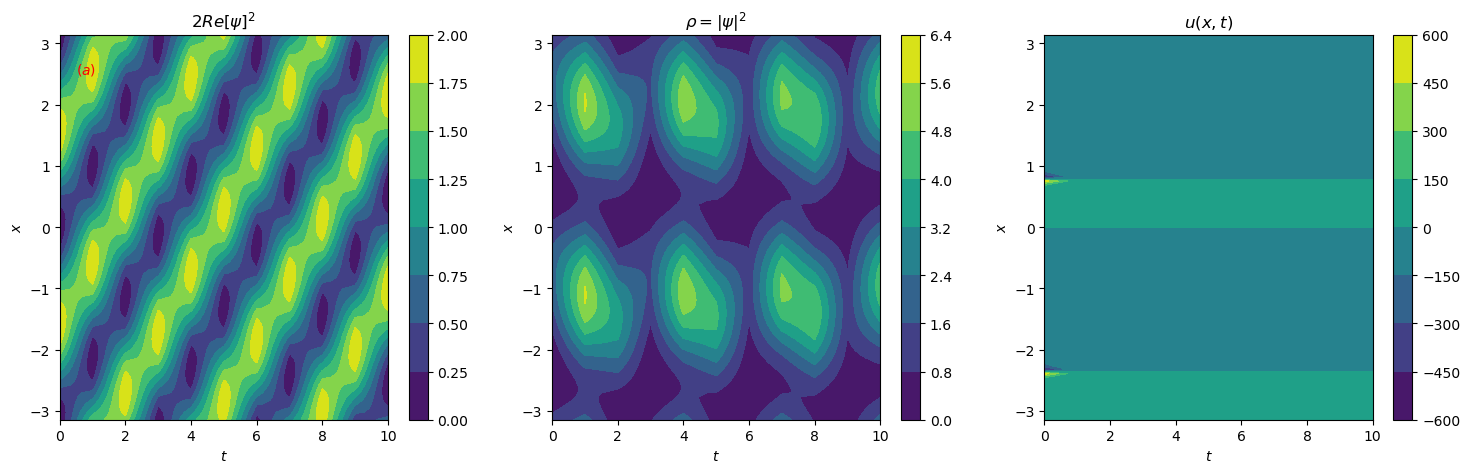

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.algebras.quaternion import Quaternion

# 定义符号变量
x, t = sp.symbols('x t')

# 定义四元数分量
def a(x, t):
    return np.sin(x - t)

def b(x, t):
    return np.cos(x + t)

def c(x, t):
    return np.cos(x + t)

def d(x, t):
    return np.cos(x - t)

# 定义四元数
def quaternion(x, t):
    return Quaternion(a(x, t), b(x, t), c(x, t), d(x, t))

# # 定义psi
def psi(x, t):
    return a(x, t) + b(x, t) * 1j + c(x, t) * 1j**2 + d(x, t) * 1j**3

def u(t, x):
    return (2 * np.sin(t - x)**2 + 2 * np.sin(t + x)**2 + 2 * np.cos(t - x)**2 + 2 * np.cos(t + x)**2) / 2

# # 定义psi的共轭
# def psi_conj(x, t):
#     return np.conj(psi(x, t))

# # 计算四元数的实部
# def quaternion_real_part(quat):
#     return quat.a

# 创建网格
x_vals = np.linspace(-np.pi, np.pi, 101)
t_vals = np.linspace(0, 10, 11)
X, T = np.meshgrid(x_vals, t_vals)

# # 计算四元数的实部
a_vals = a(X, T)

# # 计算 2 * Re[ψ]^2
real_part_squared = 2 * a_vals**2

# # 计算 rho = |psi|^2
psi_vals1 = psi(X, T)
rho_vals = np.abs(psi_vals1)**2


# 计算速度场 u(x, t)
hbar = 1  # 可以调整为你需要的值
psi_x = np.gradient(psi_vals1, axis=0) 
u_vals = 10 * (np.conj(psi_vals1) * psi_x - np.conj(psi_x) * psi_vals1) / rho_vals

u_imag_vals = np.imag(u_vals)

# 可视化 2 * Re[ψ]^2
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.contourf(T, X, real_part_squared, cmap='viridis')
plt.title('$2Re[ψ]^2$')
plt.colorbar()
plt.text(0.5, 2.5, '$(a)$', color='red')
plt.xlabel('$t$')
plt.ylabel('$x$')

plt.subplot(1, 3, 2)
plt.contourf(T, X, rho_vals, cmap='viridis')
plt.title('$\\rho = |ψ|^2$')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')

plt.subplot(1, 3, 3)
plt.contourf(T, X, u_imag_vals, cmap='viridis')
plt.title('$u(x, t)$')
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')

# plt.savefig('wave_function.png', dpi=500)
plt.show()



由于计算完的速度场也是四元数，并且只有$k$向分量，因此我们直接可视化$k$的分量

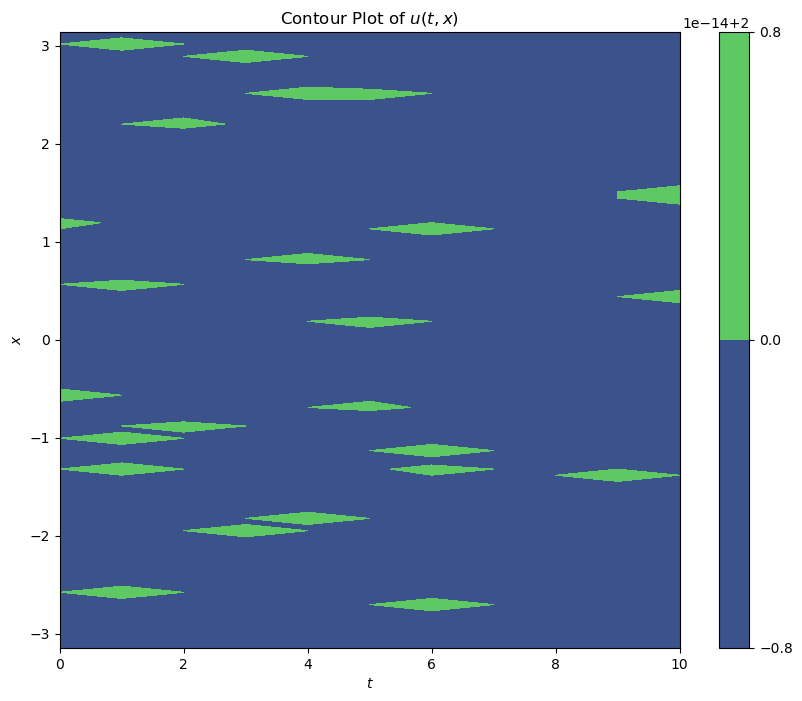

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 定义u的函数
def u(t, x):
    return (2 * np.sin(t - x)**2 + 2 * np.sin(t + x)**2 + 2 * np.cos(t - x)**2 + 2 * np.cos(t + x)**2) / 2

# 创建网格
t_vals = np.linspace(0, 10, 11)
x_vals = np.linspace(-np.pi, np.pi, 101)
T, X = np.meshgrid(t_vals, x_vals)

# 计算u的值
U = u(T, X)

# 绘制等值线图
plt.figure(figsize=(10, 8))
contour = plt.contourf(T, X, U, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of $u(t, x)$')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()


In [43]:
def u_test(t, x):
    return (2 * np.sin(t - x)**2 ) / 2
# + 2 * np.sin(t + x)**2 + 2 * np.cos(t - x)**2 + 2 * np.cos(t + x)**2

U_test = u_test(T, X)

In [58]:
T,X

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        ...,
        [ 8.,  8.,  8., ...,  8.,  8.,  8.],
        [ 9.,  9.,  9., ...,  9.,  9.,  9.],
        [10., 10., 10., ..., 10., 10., 10.]]),
 array([[-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265],
        [-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265],
        [-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265],
        ...,
        [-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265],
        [-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265],
        [-3.14159265, -3.0787608 , -3.01592895, ...,  3.01592895,
          3.0787608 ,  3.14159265]]))

In [36]:
u_vals.shape,U.shape, u_vals[1,1],u_imag_vals[1,1],

((100, 100),
 (100, 100),
 0.22795381627317082j,
 0.22795381627317082,
 0.7327010332954342)

In [68]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# 生成示例数据函数
def generate_data(num_samples, grid_size):
    x_vals = np.linspace(-np.pi, np.pi, grid_size)
    t_vals = np.linspace(0, 10, grid_size)
    X, T = np.meshgrid(x_vals, t_vals)
    
    quaternions = []
    densities = []
    velocities = []
    
    for _ in range(num_samples):
        a_vals = np.sin(X - T)
        b_vals = np.cos(X + T)
        c_vals = np.cos(X + T)
        d_vals = np.cos(X - T)
        
        quat_field = np.stack([a_vals, b_vals, c_vals, d_vals], axis=-1)
        psi_vals = a_vals + b_vals * 1j + c_vals * (1j**2) + d_vals * (1j**3)
        rho_vals = np.abs(psi_vals)**2
        psi_x = np.gradient(psi_vals, axis=0)
        u_vals = 10 * (np.conj(psi_vals) * psi_x - np.conj(psi_x) * psi_vals) / rho_vals
        u_imag_vals = np.imag(u_vals)
        
        quaternions.append(quat_field)
        densities.append(rho_vals)
        velocities.append(u_imag_vals)
    
    return np.array(quaternions), np.array(densities), np.array(velocities)



In [76]:
# 数据准备
num_samples = 1000
grid_size = 100
quaternions, densities, velocities = generate_data(num_samples, grid_size)
X = torch.tensor(quaternions, dtype=torch.float32).permute(0, 3, 1, 2)
y = torch.tensor(np.stack([densities, velocities], axis=-1), dtype=torch.float32).permute(0, 3, 1, 2)


In [77]:
quaternions.shape, densities.shape, velocities.shape, X.shape, y.shape

((1000, 100, 100, 4),
 (1000, 100, 100),
 (1000, 100, 100),
 torch.Size([1000, 4, 100, 100]),
 torch.Size([1000, 2, 100, 100]))

In [78]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 4, 100, 100]),
 torch.Size([800, 2, 100, 100]),
 torch.Size([200, 4, 100, 100]),
 torch.Size([200, 2, 100, 100]))

In [80]:

# 定义模型
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.enc1 = nn.Conv2d(4, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        self.up1 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec1 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.out = nn.Conv2d(64, 2, kernel_size=1)
        
    def forward(self, x):
        x1 = torch.relu(self.enc1(x))
        x2 = self.pool1(x1)
        x3 = torch.relu(self.enc2(x2))
        x4 = self.pool2(x3)
        x5 = torch.relu(self.enc3(x4))
        
        x6 = torch.relu(self.up1(x5))
        x7 = torch.relu(self.dec1(x6))
        x8 = torch.relu(self.up2(x7))
        x9 = torch.relu(self.dec2(x8))
        return self.out(x9)


In [81]:
# 创建模型、损失函数和优化器
model = UNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [82]:
# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss / len(train_loader)}')



Epoch 1/10, Train Loss: 10.697184677124023
Epoch 2/10, Train Loss: 9.421072273254394
Epoch 3/10, Train Loss: 9.271019020080566
Epoch 4/10, Train Loss: 8.557802238464355
Epoch 5/10, Train Loss: 6.975409526824951
Epoch 6/10, Train Loss: 5.624690761566162
Epoch 7/10, Train Loss: 3.5596852684020996
Epoch 8/10, Train Loss: 1.7786969089508056
Epoch 9/10, Train Loss: 1.0178310656547547
Epoch 10/10, Train Loss: 0.446984783411026


In [83]:
# 测试模型
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
print(f'Test Loss: {test_loss / len(test_loader)}')



Test Loss: 0.24985839213643754


In [84]:

# 使用模型预测
model.eval()
predictions = []
with torch.no_grad():
    for X_batch in test_loader:
        preds = model(X_batch[0])
        predictions.append(preds)

In [85]:
predictions = torch.cat(predictions, dim=0)
predictions[index, :, :, 0].shape

torch.Size([2, 100])

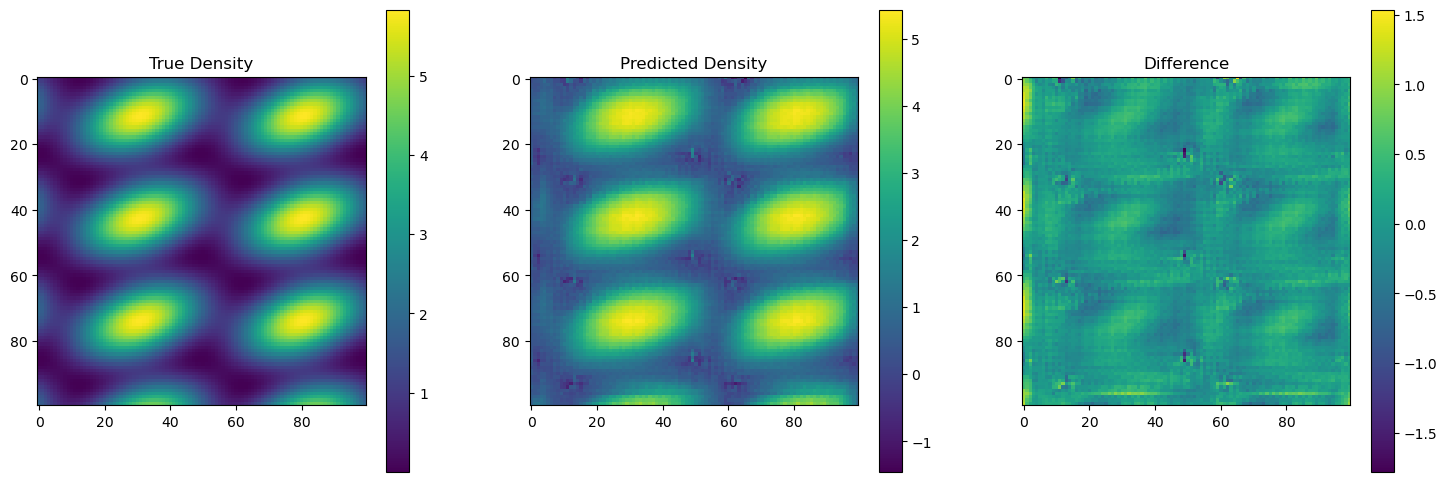

In [86]:
index = 0  # 选择一个样本进行可视化
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('True Density')
plt.imshow(y_test[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Predicted Density')
plt.imshow(predictions[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow((y_test[index, 0, :, :].numpy() - predictions[index, 0, :, :].numpy()), cmap='viridis')
plt.colorbar()

plt.show()

## 速度

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# 生成示例数据函数
def generate_data(num_samples, grid_size):
    x_vals = np.linspace(-np.pi, np.pi, grid_size)
    t_vals = np.linspace(0, 10, grid_size)
    X, T = np.meshgrid(x_vals, t_vals)
    
    quaternions = []
    densities = []
    velocities = []
    
    for _ in range(num_samples):
        a_vals = np.sin(X - T)
        b_vals = np.cos(X + T)
        c_vals = np.cos(X + T)
        d_vals = np.cos(X - T)
        
        quat_field = np.stack([a_vals, b_vals, c_vals, d_vals], axis=-1)
        psi_vals = a_vals + b_vals * 1j + c_vals * (1j**2) + d_vals * (1j**3)
        rho_vals = np.abs(psi_vals)**2
        psi_x = np.gradient(psi_vals, axis=0)
        u_vals = 10 * (np.conj(psi_vals) * psi_x - np.conj(psi_x) * psi_vals) / rho_vals
        u_imag_vals = np.imag(u_vals)
        
        quaternions.append(quat_field)
        densities.append(rho_vals)
        velocities.append(u_imag_vals)
    
    return np.array(quaternions), np.array(densities), np.array(velocities)


In [2]:
# 数据准备
num_samples = 1000
grid_size = 100
quaternions, densities, velocities = generate_data(num_samples, grid_size)
X = torch.tensor(quaternions, dtype=torch.float32).permute(0, 3, 1, 2)
y_densities = torch.tensor(densities, dtype=torch.float32).unsqueeze(1)  # 添加通道维度
y_velocities = torch.tensor(velocities, dtype=torch.float32).unsqueeze(1)  # 添加通道维度

# 分割数据集
X_train, X_test, y_densities_train, y_densities_test, y_velocities_train, y_velocities_test = train_test_split(X, y_densities, y_velocities, test_size=0.2, random_state=42)
train_dataset = TensorDataset(X_train, y_densities_train, y_velocities_train)
test_dataset = TensorDataset(X_test, y_densities_test, y_velocities_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [3]:
# 定义模型
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.enc1 = nn.Conv2d(4, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        self.up1 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec1 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        
        self.out_density = nn.Conv2d(64, 1, kernel_size=1)  # 密度输出
        self.out_velocity = nn.Conv2d(64, 1, kernel_size=1)  # 速度输出
        
    def forward(self, x):
        x1 = torch.relu(self.enc1(x))
        x2 = self.pool1(x1)
        x3 = torch.relu(self.enc2(x2))
        x4 = self.pool2(x3)
        x5 = torch.relu(self.enc3(x4))
        
        x6 = torch.relu(self.up1(x5))
        x7 = torch.relu(self.dec1(x6))
        x8 = torch.relu(self.up2(x7))
        x9 = torch.relu(self.dec2(x8))
        
        density = self.out_density(x9)
        velocity = self.out_velocity(x9)
        return density, velocity


In [4]:
# 创建模型、损失函数和优化器
model = UNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_densities_batch, y_velocities_batch in train_loader:
        optimizer.zero_grad()
        outputs_density, outputs_velocity = model(X_batch)
        loss_density = criterion(outputs_density, y_densities_batch)
        loss_velocity = criterion(outputs_velocity, y_velocities_batch)
        loss = loss_density + loss_velocity
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss / len(train_loader)}')


Epoch 1/10, Train Loss: 13.479544486999512
Epoch 2/10, Train Loss: 9.286099586486817
Epoch 3/10, Train Loss: 4.666924142837525
Epoch 4/10, Train Loss: 2.942390546798706
Epoch 5/10, Train Loss: 1.2372292947769166
Epoch 6/10, Train Loss: 0.3307161915302277
Epoch 7/10, Train Loss: 0.24588923335075377
Epoch 8/10, Train Loss: 0.1399441307783127
Epoch 9/10, Train Loss: 0.07723127990961075
Epoch 10/10, Train Loss: 0.06658254638314247


In [11]:
# 测试模型
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_densities_batch, y_velocities_batch in test_loader:
        outputs_density, outputs_velocity = model(X_batch)
        loss_density = criterion(outputs_density, y_densities_batch)
        loss_velocity = criterion(outputs_velocity, y_velocities_batch)
        loss = loss_density + loss_velocity
        test_loss += loss.item()
print(f'Test Loss: {test_loss / len(test_loader)}')


Test Loss: 0.06735216081142426


In [12]:
# 使用模型预测
model.eval()
predictions_density = []
predictions_velocity = []
with torch.no_grad():
    for X_batch in test_loader:
        X = X_batch[0]  # 获取输入数据
        preds_density, preds_velocity = model(X)
        predictions_density.append(preds_density)
        predictions_velocity.append(preds_velocity)


In [13]:
# 将 predictions 列表转换为张量
predictions_density = torch.cat(predictions_density, dim=0)
predictions_velocity = torch.cat(predictions_velocity, dim=0)


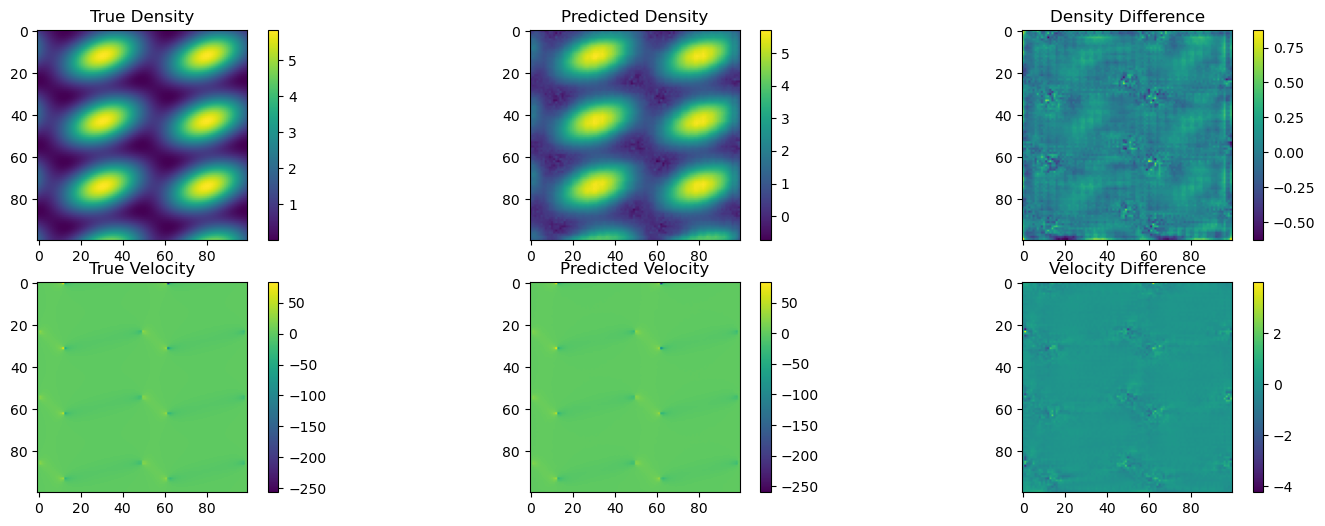

In [14]:
import matplotlib.pyplot as plt

index = 0  # 选择一个样本进行可视化
plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.title('True Density')
plt.imshow(y_densities_test[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.title('Predicted Density')
plt.imshow(predictions_density[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.title('Density Difference')
plt.imshow((y_densities_test[index, 0, :, :].numpy() - predictions_density[index, 0, :, :].numpy()), cmap='viridis')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.title('True Velocity')
plt.imshow(y_velocities_test[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.title('Predicted Velocity')
plt.imshow(predictions_velocity[index, 0, :, :].numpy(), cmap='viridis')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.title('Velocity Difference')
plt.imshow((y_velocities_test[index, 0, :, :].numpy() - predictions_velocity[index, 0, :, :].numpy()), cmap='viridis')
plt.colorbar()

plt.savefig('UnetWaveepoch10.png', dpi=500)
plt.show()

# 二维速度场尝试

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import numpy as np


In [31]:
def visualize_velocity_fields(inputs, labels=None, predictions=None, num_samples=5):
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))
    # num_samples 这个图几行
    for i in range(num_samples):
        # 提取样本
        sample = inputs[i]
        vx = sample[0].numpy()
        vy = sample[1].numpy()
        
        # 可视化 x 方向速度场
        ax1 = axes[i, 0]
        cax1 = ax1.imshow(vx, cmap='viridis')
        fig.colorbar(cax1, ax=ax1, orientation='vertical')
        ax1.set_title(f'Sample {i+1} - Vx')
        ax1.axis('off')
        
        # 可视化 y 方向速度场
        ax2 = axes[i, 1]
        cax2 = ax2.imshow(vy, cmap='viridis')
        fig.colorbar(cax2, ax=ax2, orientation='vertical')
        ax2.set_title(f'Sample {i+1} - Vy')
        ax2.axis('off')
        
        if labels is not None and predictions is not None:
            label = labels[i]
            prediction = predictions[i]
            
            # 计算误差
            error = (prediction - label).abs()
            ex = error[0].numpy()
            ey = error[1].numpy()
            
            # 可视化误差
            ax3 = axes[i, 2]
            cax3 = ax3.imshow((ex + ey) / 2, cmap='hot')
            fig.colorbar(cax3, ax=ax3, orientation='vertical')
            ax3.set_title(f'Sample {i+1} - Error')
            ax3.axis('off')
    
    plt.tight_layout()
    plt.show()


In [3]:
# 随机生成数据函数
def generate_random_velocity_fields(num_samples, height, width):
    # 生成形状为 (num_samples, 2, height, width) 的随机速度场
    inputs = torch.randn(num_samples, 2, height, width)
    labels = torch.randn(num_samples, 2, height, width)
    return inputs, labels

In [33]:
# 生成训练和验证数据
num_train_samples = 1000
num_val_samples = 200
height, width = 128, 128

train_inputs, train_labels = generate_random_velocity_fields(num_train_samples, height, width)
val_inputs, val_labels = generate_random_velocity_fields(num_val_samples, height, width)



In [48]:
# 创建DataLoader
batch_size = 32
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 检查数据形状
print(f'Train data shape: {train_inputs.shape}')
print(f'Validation data shape: {val_inputs.shape}')


Train data shape: torch.Size([1000, 2, 128, 128])
Validation data shape: torch.Size([200, 2, 128, 128])


In [ ]:
# 从训练数据中随机选择一些样本进行可视化
num_samples_to_visualize = 3
#从len(train_inputs)中随机选择num_samples_to_visualize个数，replace=False表示不重复
indices = np.random.choice(len(train_inputs), num_samples_to_visualize, replace=False)
selected_samples = train_inputs[indices]

visualize_velocity_fields(selected_samples, num_samples=num_samples_to_visualize)

In [50]:
train_inputs[[1,2,3]].shape

torch.Size([3, 2, 128, 128])

In [51]:

class CNNModel(nn.Module):
    def __init__(self, input_shape):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * (input_shape[0] // 4) * (input_shape[1] // 4), 64)
        self.fc2 = nn.Linear(64, input_shape[0] * input_shape[1] * 2)
        self.input_shape = input_shape

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = x.view(-1, 64 * (self.input_shape[0] // 4) * (self.input_shape[1] // 4))
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(-1, 2, self.input_shape[0], self.input_shape[1])
        return x

In [52]:
# 假设输入速度场大小为 (height, width, 2)
input_shape = (128, 128)
model = CNNModel(input_shape)
print(model)


CNNModel(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32768, bias=True)
)


In [53]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [54]:
num_epochs = 30

In [55]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    print(f'Validation Loss: {val_loss/len(val_loader)}')



Epoch [1/30], Loss: 1.006494965404272
Validation Loss: 1.0038277847426278
Epoch [2/30], Loss: 1.0027793124318123
Validation Loss: 1.0019680517060416
Epoch [3/30], Loss: 1.0005671083927155
Validation Loss: 1.0011480280331202
Epoch [4/30], Loss: 0.9998093266040087
Validation Loss: 1.0010124955858504
Epoch [5/30], Loss: 0.999586446210742
Validation Loss: 1.0010155865124293
Epoch [6/30], Loss: 0.9996014703065157
Validation Loss: 1.0010582549231393
Epoch [7/30], Loss: 0.9994910061359406
Validation Loss: 1.000992817538125
Epoch [8/30], Loss: 0.999496404081583
Validation Loss: 1.001055725983211
Epoch [9/30], Loss: 0.9995388817042112
Validation Loss: 1.0010516473225184
Epoch [10/30], Loss: 0.9995236750692129
Validation Loss: 1.0009811520576477
Epoch [11/30], Loss: 0.9994964171200991
Validation Loss: 1.0010375465665544
Epoch [12/30], Loss: 0.9994382075965405
Validation Loss: 1.0010351198060172
Epoch [13/30], Loss: 0.9995395950973034
Validation Loss: 1.00102961063385
Epoch [14/30], Loss: 0.99945

In [56]:
num_samples_to_visualize = 5
test_inputs = val_inputs[:num_samples_to_visualize]
test_labels = val_labels[:num_samples_to_visualize]
model.eval()
with torch.no_grad():
    predictions = model(test_inputs)

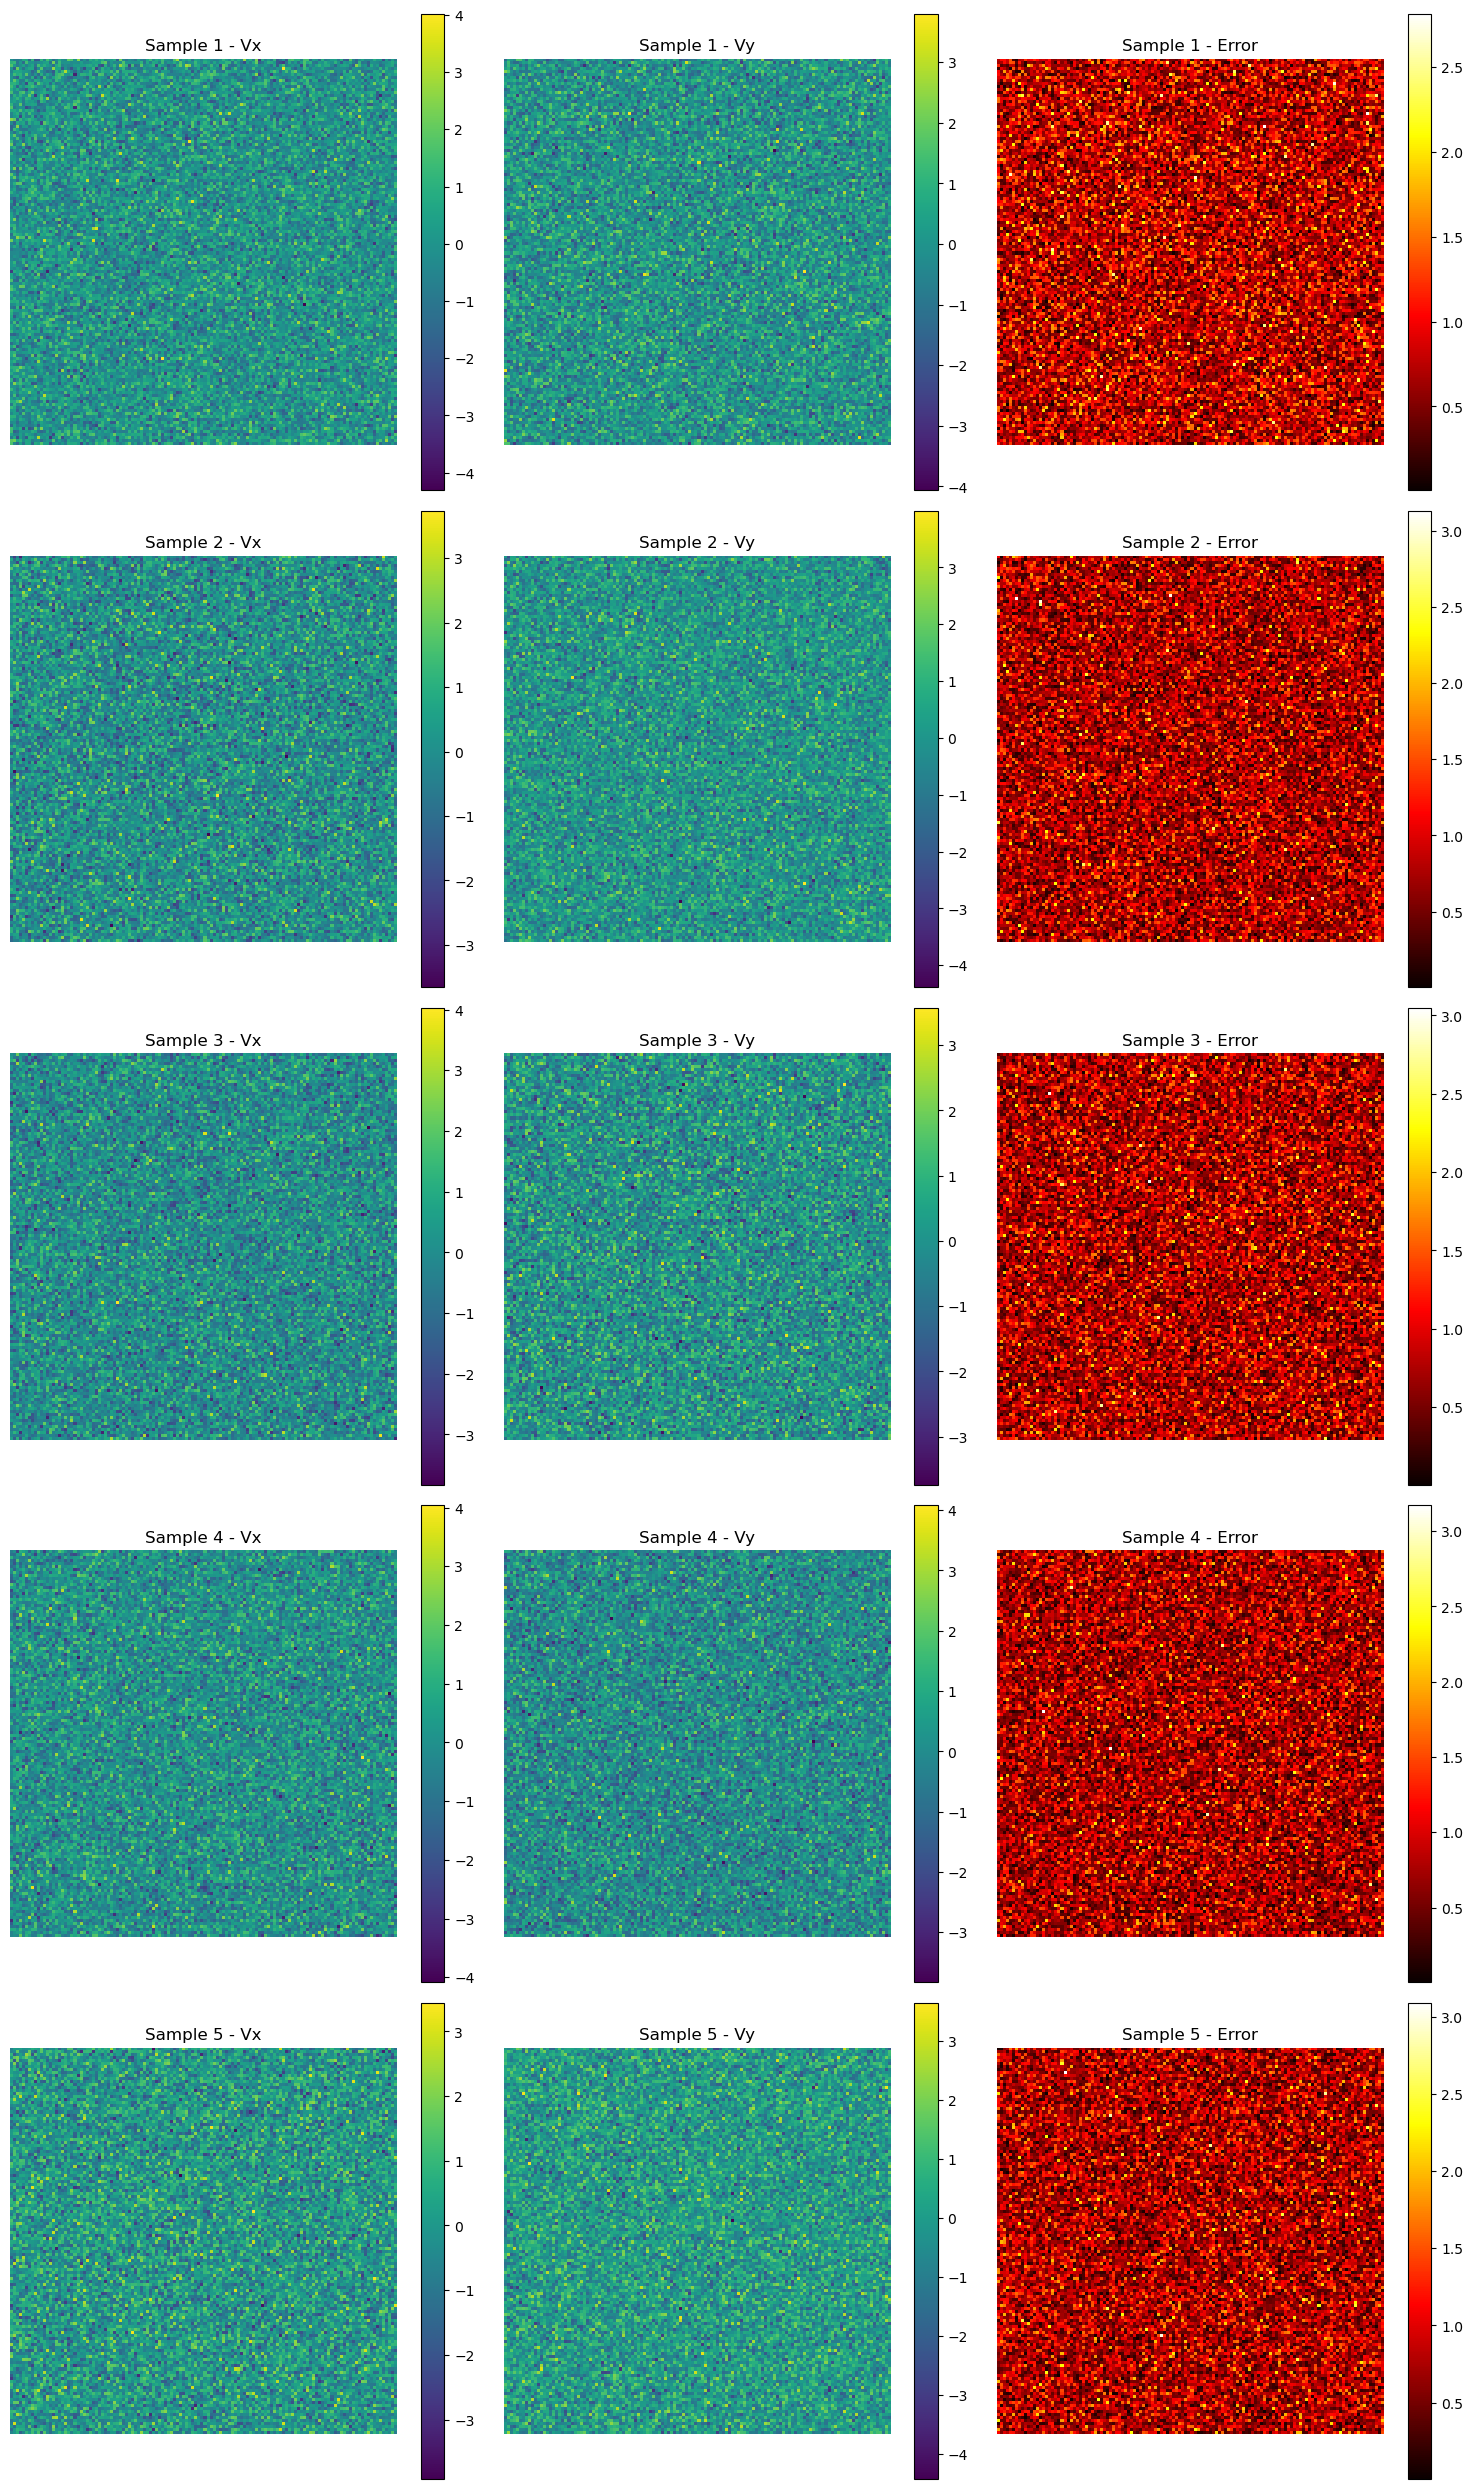

In [57]:
visualize_velocity_fields(test_inputs, labels=test_labels, predictions=predictions, num_samples=num_samples_to_visualize)

# 公式计算


In [2]:
import sympy as sp
from sympy.algebras.quaternion import Quaternion

x, t = sp.symbols('x t')
# 定义符号变量
a = sp.sin(x - t)
b = sp.cos(x + t)
c = sp.sin(x + t)
d = sp.cos(x - t)

# 求导
a_x = sp.diff(a, x)
b_x = sp.diff(b, x)
c_x = sp.diff(c, x)
d_x = sp.diff(d, x)


hbar = 1

(a*b_x - b*a_x + c*d_x - d*c_x)

2*sin(t - x)*sin(t + x) - 2*cos(t - x)*cos(t + x)

### 计算分量

In [93]:
# 各自方向分量
u_x = -b*a_x + a*b_x + c*d_x - d*c_x

u_x

2*sin(t - x)*sin(t + x) - 2*cos(t - x)*cos(t + x)

In [80]:
-b*a_x + a*b_x 

sin(t - x)*sin(t + x) - cos(t - x)*cos(t + x)

In [83]:
-d*c_x + c*d_x

sin(t - x)*sin(t + x) - cos(t - x)*cos(t + x)

In [92]:
-sp.cos(x + t)*sp.cos(x - t)-sp.sin(x + t)*sp.sin(x - t)-sp.cos(x - t)*sp.cos(x + t)-sp.sin(x - t)*sp.sin(x + t)

2*sin(t - x)*sin(t + x) - 2*cos(t - x)*cos(t + x)

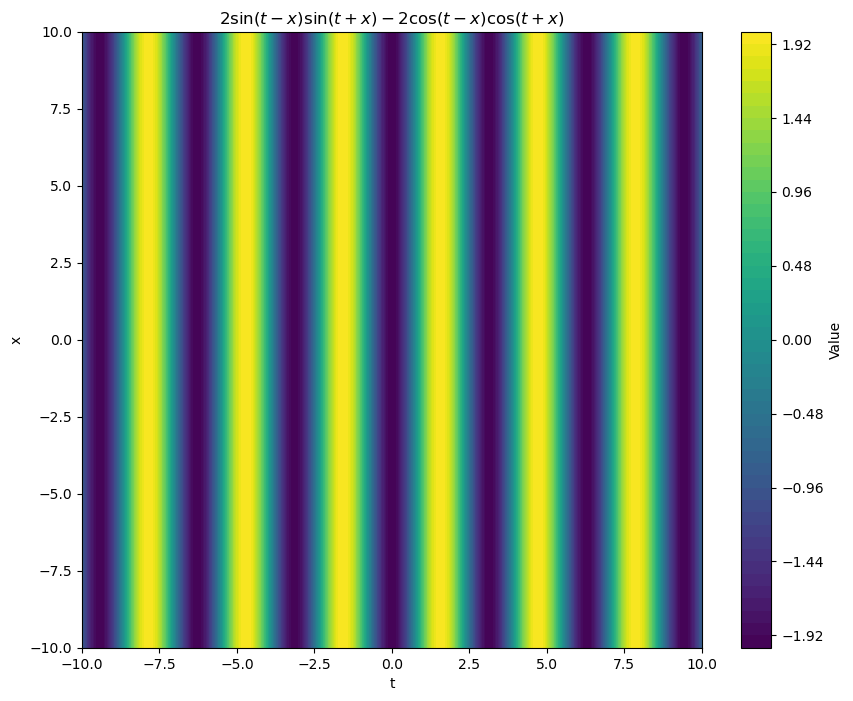

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(t, x):
    return 2 * np.sin(t - x) * np.sin(t + x) - 2 * np.cos(t - x) * np.cos(t + x)

# 创建t和x的值域
t = np.linspace(-10, 10, 400)
x = np.linspace(-10, 10, 400)

# 创建网格
T, X = np.meshgrid(t, x)
Z = f(T, X)

# 绘制图像
plt.figure(figsize=(10, 8))
plt.contourf(T, X, Z, levels=50, cmap='viridis')
plt.colorbar(label='Value')
plt.title(r'$2\sin(t-x)\sin(t+x) - 2\cos(t-x)\cos(t+x)$')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


### 二维尝试

In [110]:
import sympy as sp
from sympy.algebras.quaternion import Quaternion

x,y,t = sp.symbols('x y t')
# 定义符号变量
a2 = sp.sin(x - t ) + sp.cos(y - t )
b2 = sp.cos(x + t ) + sp.sin(y + t )
c2 = sp.sin(x + t ) + sp.cos(y + t )
d2 = sp.cos(x - t ) + sp.sin(y - t )

# 求导
a2_x = sp.diff(a, x)
b2_x = sp.diff(b, x)
c2_x = sp.diff(c, x)
d2_x = sp.diff(d, x)

a2_y = sp.diff(a, y)
b2_y = sp.diff(b, y)
c2_y = sp.diff(c, y)
d2_y = sp.diff(d, y)



In [100]:
u_x_2 = -b2*a2_x + a2*b2_x + c2*d2_x - d2*c2_x
u_x_2

sin(t - x)*sin(t + x + y) - sin(t + x)*sin(-t + x + y) - cos(t - x)*cos(t + x + y) - cos(t + x)*cos(-t + x + y)

In [101]:
u_y_2 = -b2*a2_y + a2*b2_y + c2*d2_y - d2*c2_y
u_y_2

0

In [111]:
a2_y

0